# 1. Data Cleaning and Preparation

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\sai\OneDrive\Desktop\assigmnets\EDA1\Cardiotocographic.csv")
df.head()
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
# Handle missing values (imputation with median as an example)
df.fillna(df.median(), inplace=True)
# Check and correct data types
print("Data types before conversion:")
print(df.dtypes)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# Display the cleaned dataset information
df.info()


Missing values per column:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
Data types before conversion:
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 896 entries, 1 to 2120
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        896 non-null    float64
 1   AC        896 non-null    float64
 2   FM        896 non-null    float64
 3   UC        896 non-null    float64
 4   DL        896 non-null    float64
 5   DS        896 non-null    float64
 6   DP      

# 2. Statistical Summary

In [2]:
# Statistical Summary
summary_stats = df.describe()
# Print summary statistics
print("Statistical Summary:")
print(summary_stats)
mean_LB = df['LB'].mean()
std_LB = df['LB'].std()
print(f"Mean of LB: {mean_LB:.2f}, Standard Deviation of LB: {std_LB:.2f}")

Statistical Summary:
               LB          AC          FM          UC          DL     DS  \
count  896.000000  896.000000  896.000000  896.000000  896.000000  896.0   
mean   131.859413    0.004036    0.000606    0.004961    0.001547    0.0   
std      9.393070    0.003710    0.001346    0.002707    0.002214    0.0   
min    106.000000   -0.000122   -0.002467   -0.000101   -0.000124    0.0   
25%    125.000000    0.000006    0.000000    0.003143    0.000000    0.0   
50%    133.000000    0.003311    0.000000    0.005039    0.000000    0.0   
75%    138.000000    0.006672    0.000323    0.006927    0.003083    0.0   
max    160.000000    0.013861    0.006272    0.012072    0.008197    0.0   

          DP        ASTV        MSTV        ALTV        MLTV       Width  \
count  896.0  896.000000  896.000000  896.000000  896.000000  896.000000   
mean     0.0   42.465669    1.273759    3.153095    8.596245   67.784187   
std      0.0   15.055465    0.541923    6.032308    4.457159   32.

# 3. Data Visualization

<Figure size 1400x1000 with 0 Axes>

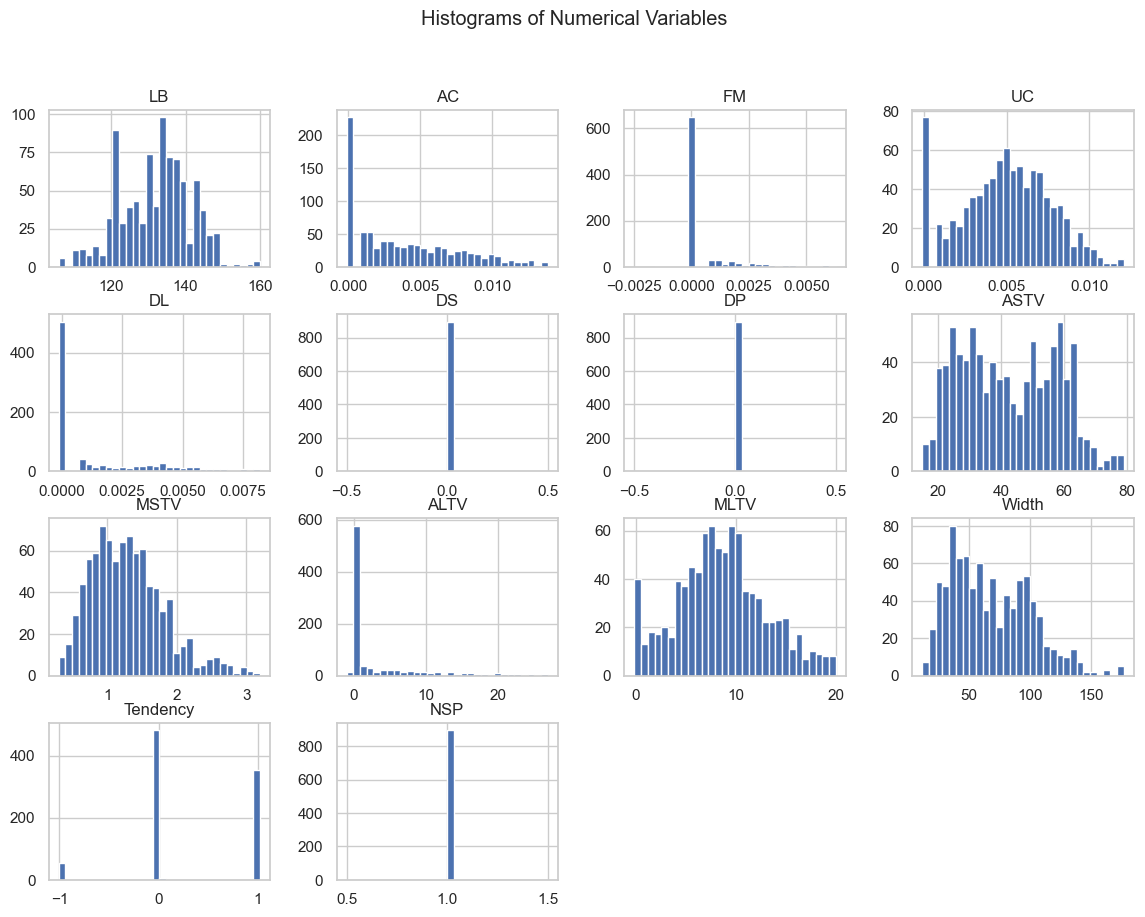

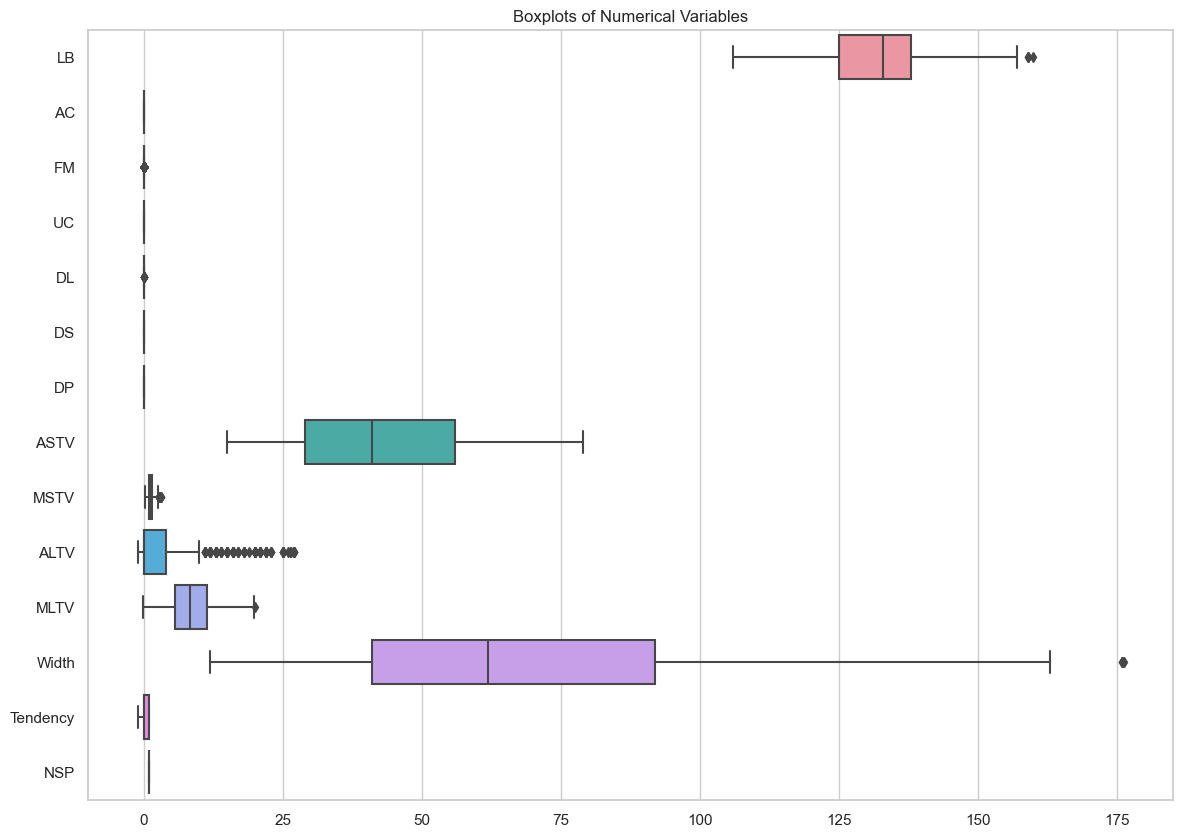

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


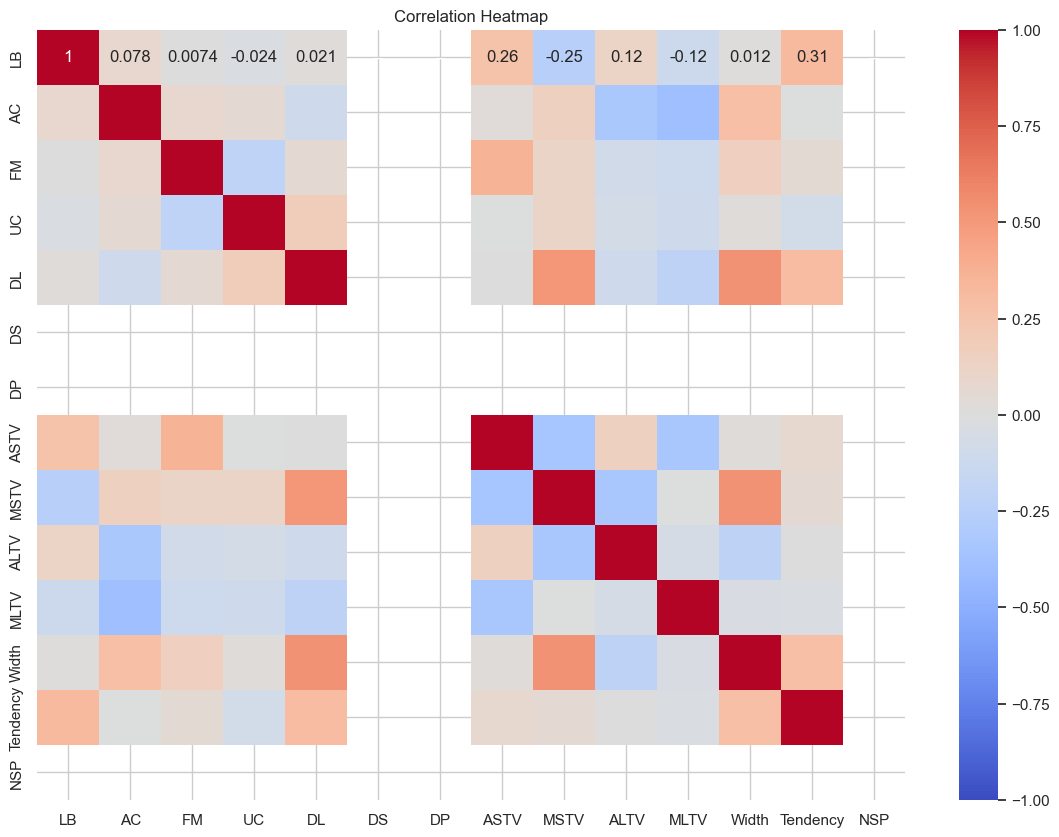

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

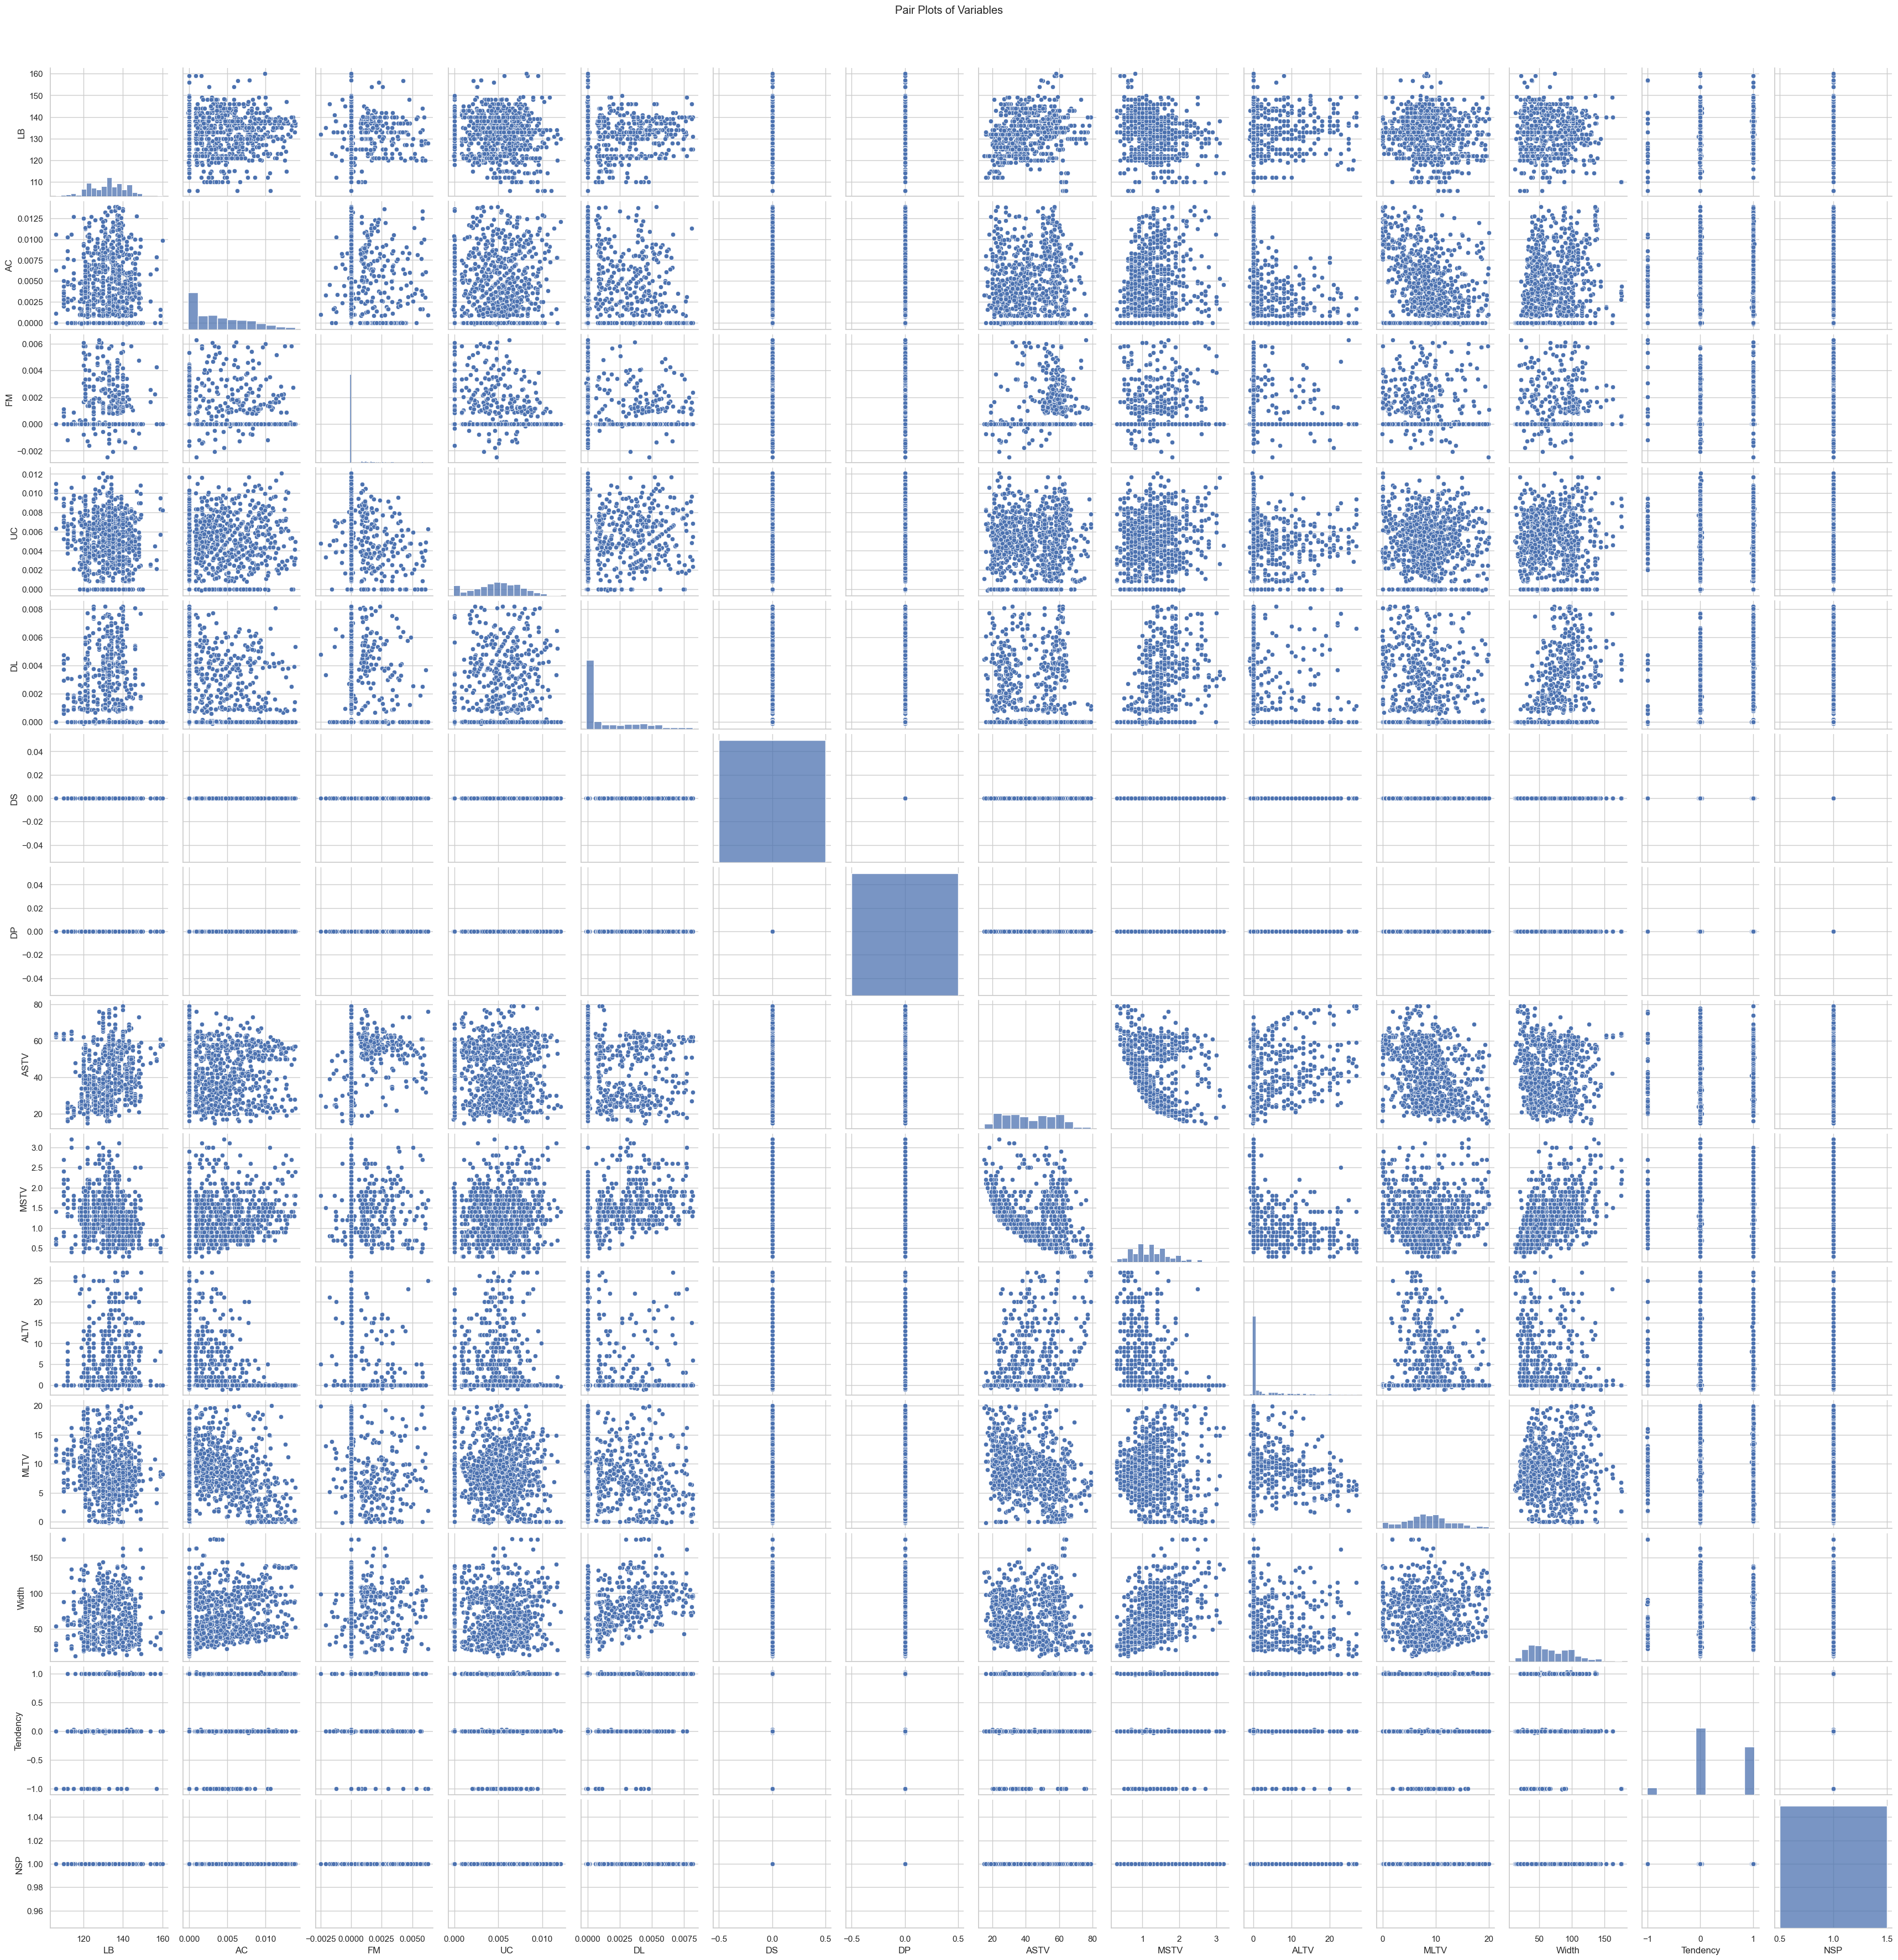

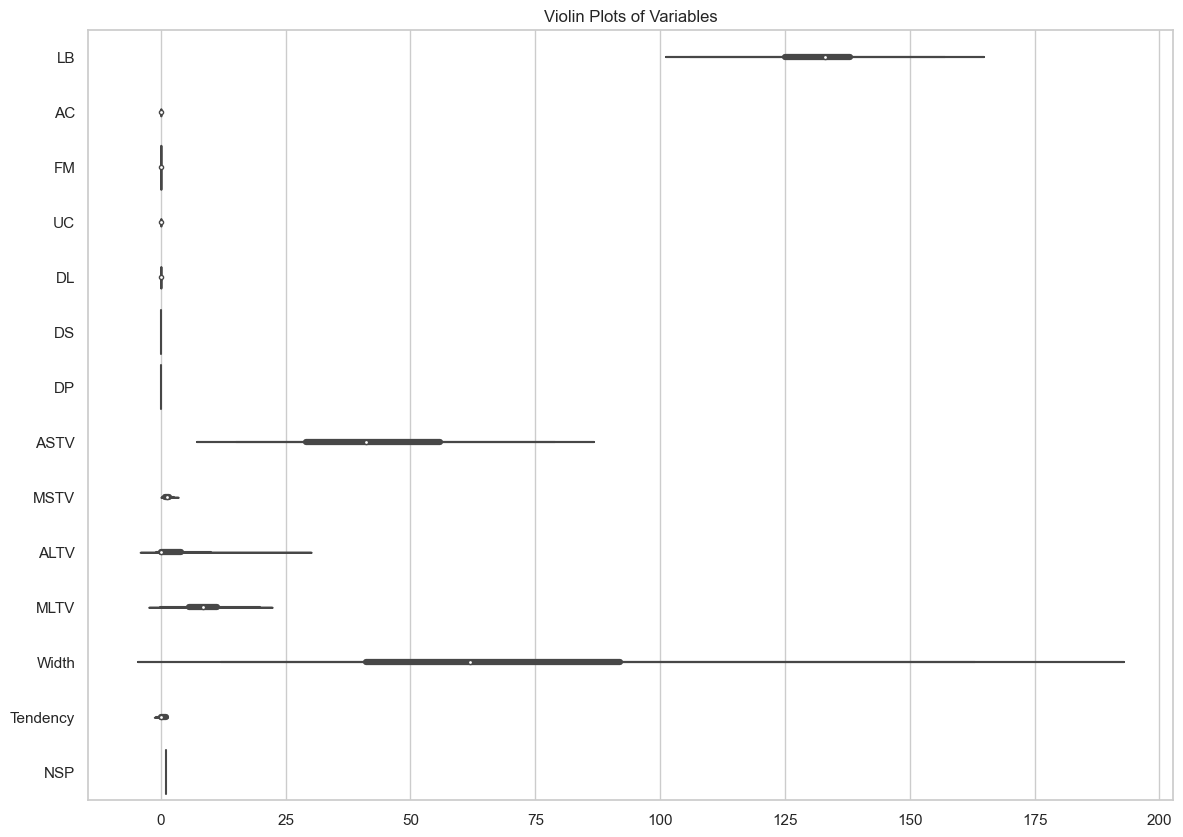

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot styles
sns.set(style="whitegrid")
# Histograms for numerical variables
plt.figure(figsize=(14, 10))
df.hist(figsize=(14, 10), bins=30)
plt.suptitle('Histograms of Numerical Variables')
plt.show()
# Boxplots for numerical variables
plt.figure(figsize=(14, 10))
sns.boxplot(data=df, orient='h')
plt.title('Boxplots of Numerical Variables')
plt.show()
# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
# Pair Plots
sns.pairplot(df)
plt.suptitle('Pair Plots of Variables', y=1.02)
plt.show()
# Violin Plots
plt.figure(figsize=(14, 10))
sns.violinplot(data=df, orient='h')
plt.title('Violin Plots of Variables')
plt.show()

# 4. Pattern Recognition and Insights

In [4]:
# Identify correlations
correlations = df.corr()
print("Correlation Matrix:")
print(correlations)
# Example of discussing implications
print("Key Insights:")
print("1. Correlation between 'LB' and 'ASTV' indicates possible relationships between baseline heart rate and abnormal variability.")
print("2. High variability in 'FM' suggests a wide range of fetal movements detected.")
print("3. Outliers in 'UC' could imply irregular contraction patterns.")

Correlation Matrix:
                LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000  0.078465  0.007362 -0.023568  0.020806 NaN NaN  0.262721   
AC        0.078465  1.000000  0.080153  0.057284 -0.101866 NaN NaN  0.024343   
FM        0.007362  0.080153  1.000000 -0.204990  0.058476 NaN NaN  0.362630   
UC       -0.023568  0.057284 -0.204990  1.000000  0.177702 NaN NaN -0.004523   
DL        0.020806 -0.101866  0.058476  0.177702  1.000000 NaN NaN  0.001806   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.262721  0.024343  0.362630 -0.004523  0.001806 NaN NaN  1.000000   
MSTV     -0.254885  0.152222  0.113420  0.110100  0.509405 NaN NaN -0.347374   
ALTV      0.123808 -0.323303 -0.087180 -0.076435 -0.107464 NaN NaN  0.150569   
MLTV     -0.118814 -0.397042 -0.110709 -0.104061 -0.214110 NaN NaN -0.330139   
Width     0.011746  

# 5. Conclusion# 

In [5]:
# Conclusion Summary
print("Conclusion:")
print("The exploratory analysis reveals significant patterns in fetal heart rate variability, movements, and contractions. These findings could be used to improve fetal monitoring practices and early detection of potential issues.")


Conclusion:
The exploratory analysis reveals significant patterns in fetal heart rate variability, movements, and contractions. These findings could be used to improve fetal monitoring practices and early detection of potential issues.
